## Alter distance metrics

In [1]:
import pandas as pd
import openensembles as oe
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

## Generate Half Rings points.
halfRings = []
while(True):
    x = np.random.normal(0,20)
    y = np.random.normal(0,20)
    z = np.random.normal(0,20)
    if ((x ** 2 + y ** 2) >= 0.5) and ((x ** 2 + y ** 2) <= 1):
        halfRings.append(list([x,y]))
    elif ((x ** 2 + y ** 2) >= 10) and ((x ** 2 + y ** 2) <= 11):
        halfRings.append(list([x,y]))
        
    if len(halfRings) == 400:
        break

halfRings = np.asarray(halfRings)
df = pd.DataFrame(halfRings)
#create an open ensembles data object from the dataframe
dataObj = oe.data(df, [1,2])

In [2]:
c = oe.cluster(dataObj)

In [3]:
c.algorithms_available()

{'AffinityPropagation': '',
 'Birch': '',
 'DBSCAN': '',
 'GaussianMixture': '',
 'MeanShift': '',
 'agglomerative': '',
 'kmeans': '',
 'spectral': ''}

In [4]:
a = c.clustering_algorithm_parameters()

algorithms_wDist = a['distance']
algorithms_wK = a['K']
algorithms_wLinkage = a['linkage']

In [5]:
# Create an ensemble of those that can take distance, for all distances
dDict = sk.metrics.pairwise.distance_metrics()
#remove precomputed from dictionary of distances
del dDict['precomputed']
dDict

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances>}

In [6]:
#PREFORM ensemble clustering 
c = oe.cluster(dataObj)

K = [2]
linkage = 'complete'

#AP does not handle K, so keep that in outer loop
for distance in dDict:
    for algorithm in algorithms_wDist:
        if algorithm not in algorithms_wK:
            name = "%s_%s"%(algorithm, distance)
            c.cluster('parent', algorithm, name, distance=distance)
        else:
            for k in K:
                name = "%s_%d_%s"%(algorithm, k, distance)
                if algorithm in algorithms_wLinkage:
                    c.cluster('parent', algorithm, name, K=k, distance=distance, linkage=linkage)
                else:
                    c.cluster('parent', algorithm, name, K=k, distance=distance)

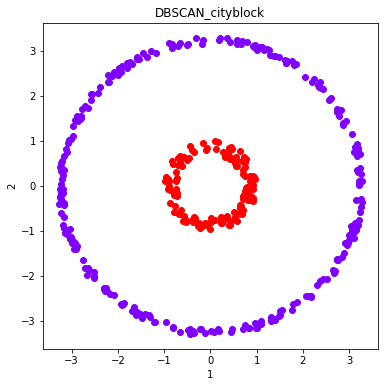

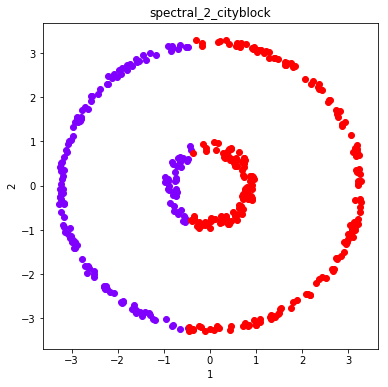

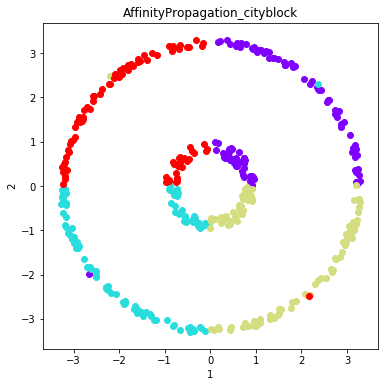

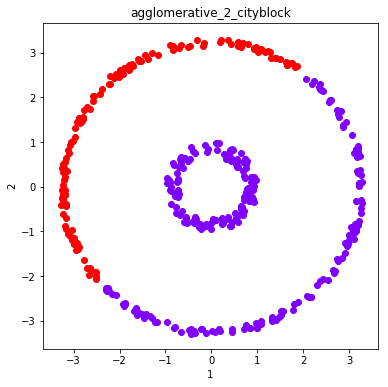

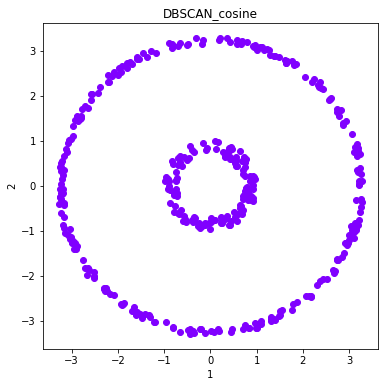

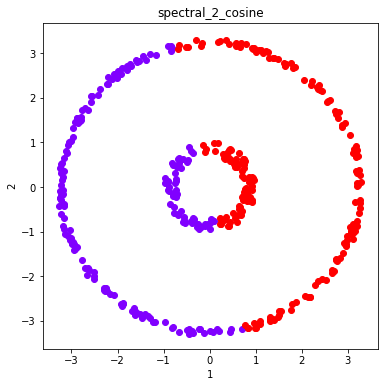

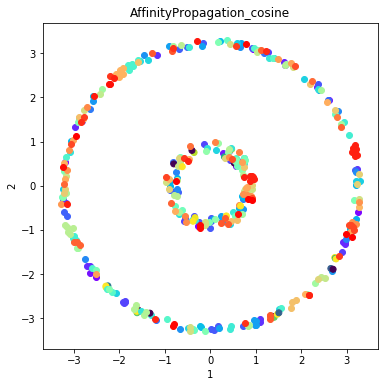

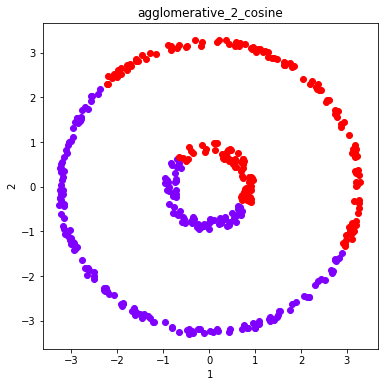

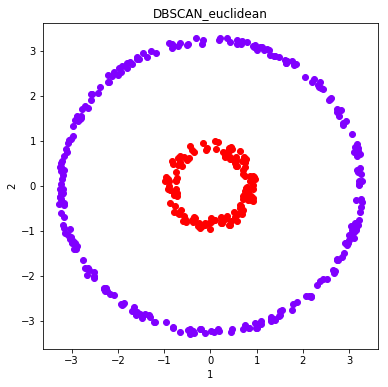

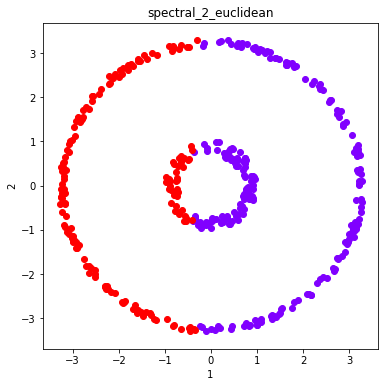

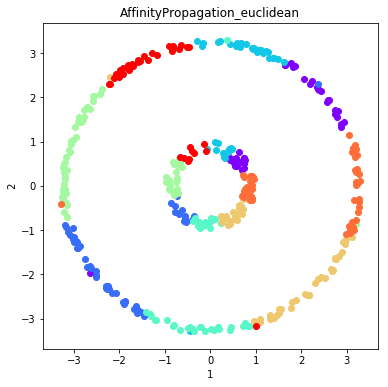

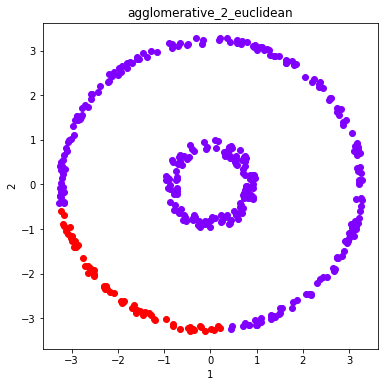

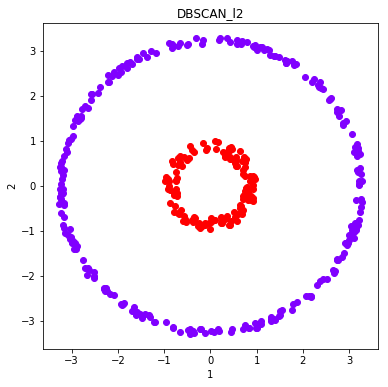

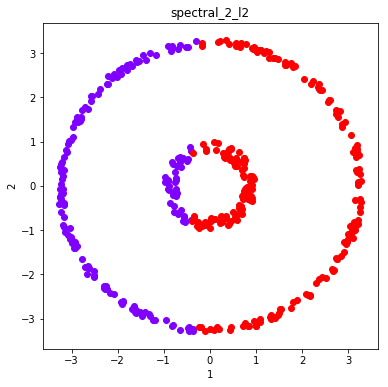

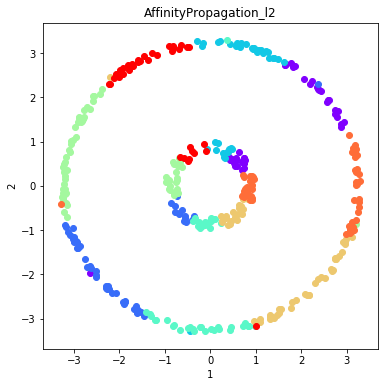

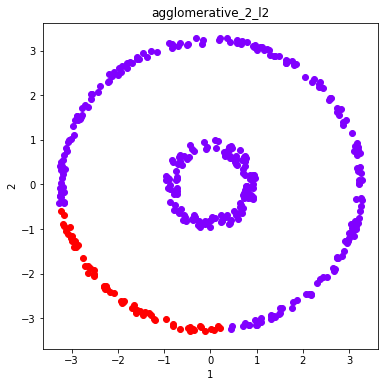

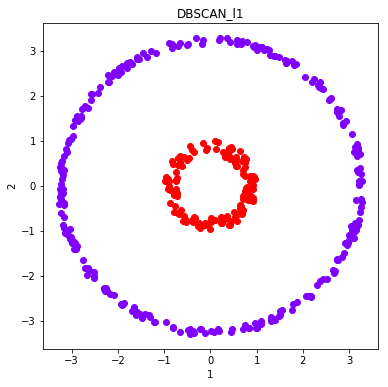

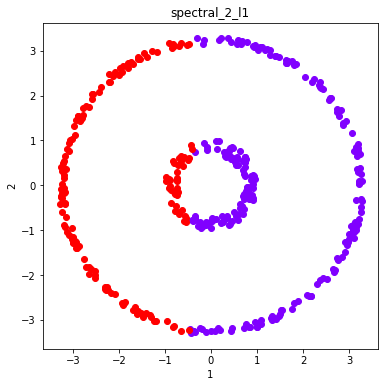

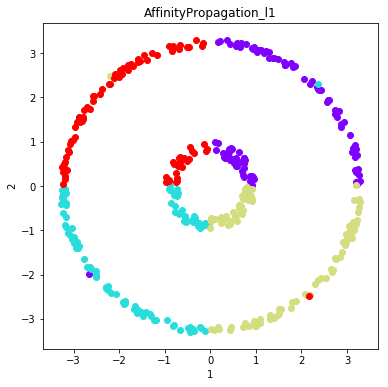

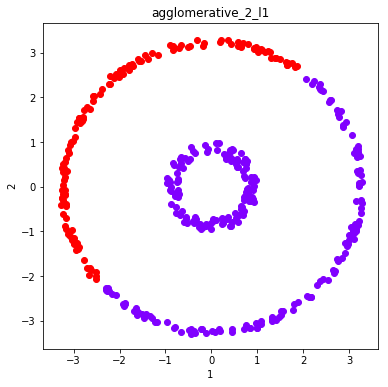

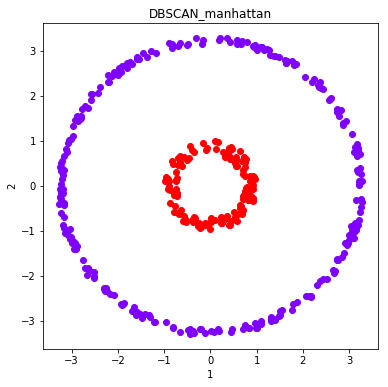

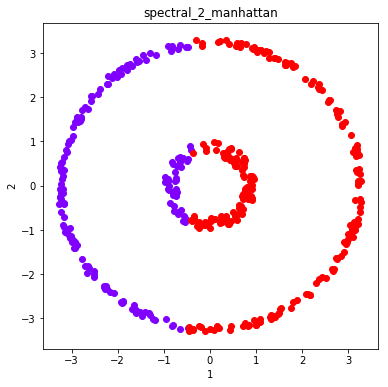

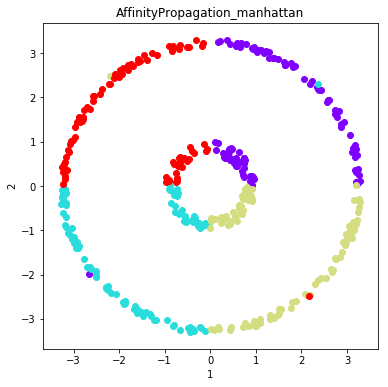

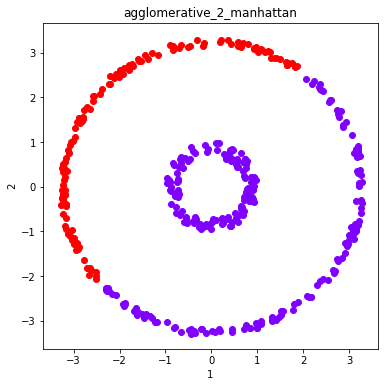

In [7]:
## Plot individual clustering solutions in the ensemble clustering object

fignum = 1
fig = {}
for solution in c.labels:
    labels = c.labels[solution]
    fig[solution] = dataObj.plot_data('parent', fignum=fignum, title=solution, class_labels=labels)
    plt.show()
    fignum += 1


## Finish the ensemble using Graph Closure and Linkage on the Co-Occurrence matrix

In [8]:
# Explore effects of threshold on graph closure
thresholds = [0.5, 0.6, 0.7, 0.8]
fig = 0
c_graph_dict = {}
c_majority_vote_dict = {}
for threshold in thresholds:
    c_graph = c.finish_graph_closure(threshold=threshold)
    c_graph_dict[str(threshold)] = c_graph
    c_majority_vote = c.finish_majority_vote(threshold=threshold)
    c_majority_vote_dict[str(threshold)] = c_majority_vote

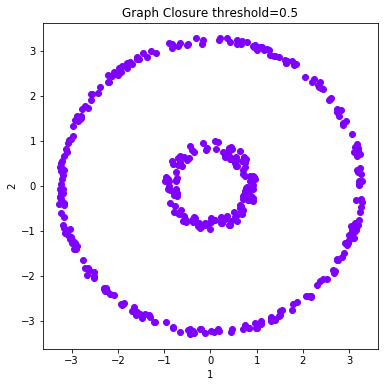

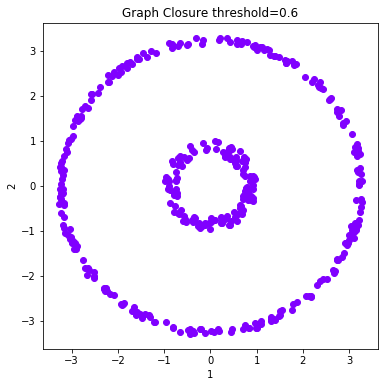

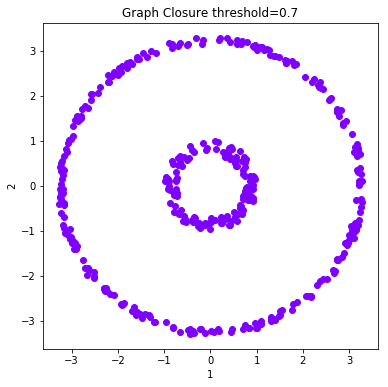

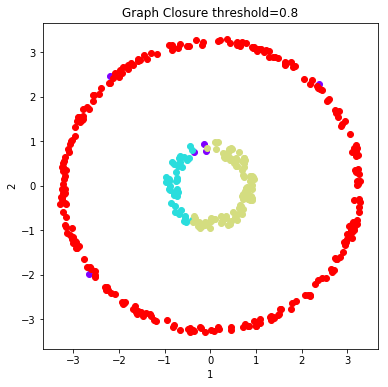

In [9]:
# Plot the solutions of Graph Closure
fig = 0
for threshold in c_graph_dict:
    labels = c_graph_dict[threshold].labels['graph_closure']
    dataObj.plot_data('parent', fig_num = fig, class_labels=labels, title='Graph Closure threshold=%s'%(threshold))
    plt.show()
    fig+=1


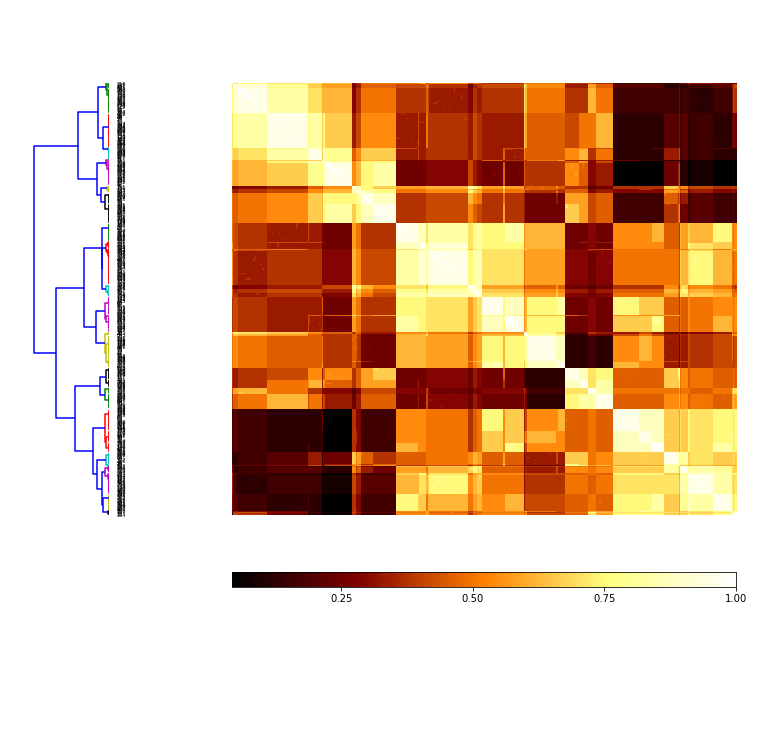

In [12]:
coMat = c.co_occurrence_matrix('parent')
coMat.plot(linkage='ward')


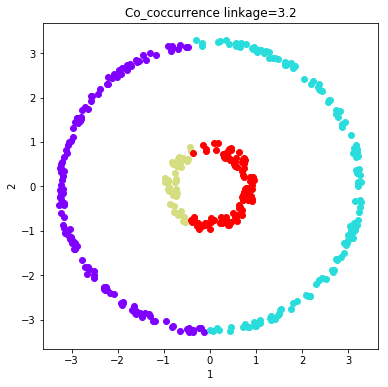

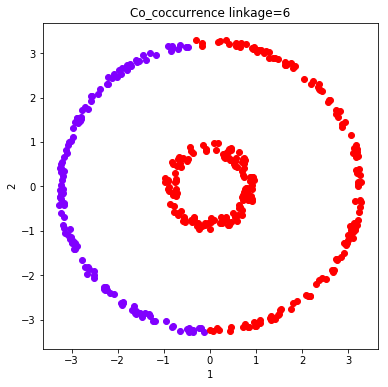

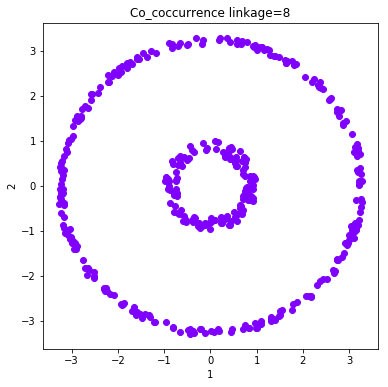

In [14]:
thresholds=[3.2, 6, 8]
for threshold in thresholds:
    fig_num = 0
    c_linkage = c.finish_co_occ_linkage(threshold, linkage='ward')
    dataObj.plot_data('parent', fig_num = fig_num, class_labels=c_linkage.labels['co_occ_linkage'], title='Co_coccurrence linkage=%s'%(threshold))
    plt.show()
    fig_num+=1